# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

- Saya memilih dataset melalui public repositori Kaggle yang berjudul "Dataset_clustering IMDB Scores" oleh The Devastator. Dataset ini memiliki yang by record memiliki 5823 baris.
- Terdapat 11 kolom Fitur, dengan campuran tipe data Kategorikal dan Numerikal.

Sumber : https://www.kaggle.com/datasets/thedevastator/Dataset_clustering-imdb-scores

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [149]:
df = pd.read_csv("data/Dataset_clustering.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [150]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


Disini terdapat beberapa fitur menarik, imdb_score dari berbagai film yang tentunya dipengaruhi juga oleh imdb_votes. Kita bisa melihat dimana letak potensi outlier dan sebagainya dari table ini.

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


Terdapat beberapa entry yang tidak sesuai, terutuama di age_certification yang hanya berisi 2998 record ketika fitur lain rata-rata di 5200 record

In [152]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


Terdapat beberapa keanehan pada nilai nilai diatas, seperti minimal dari runtime adalah 0 menit, dengan nilai maksimal 235 menit. Film terbaru rilis di tahun 2022 dengan film terlama pada tahun 1953. Data data lain terlihat cukup "normal" dengan outlier yang dimilikinya

In [153]:
df['type'].value_counts()

type
MOVIE    3407
SHOW     1876
Name: count, dtype: int64

In [154]:
df['age_certification'].value_counts(dropna=False)

age_certification
NaN      2285
TV-MA     792
R         548
TV-14     436
PG-13     424
PG        238
TV-PG     172
G         105
TV-Y7     104
TV-Y       94
TV-G       72
NC-17      13
Name: count, dtype: int64

Disini terlihat data pada fitur age_certification sebanyak 2285 data tidak memiliki nilai, yang kemungkinan akan kita drop karena jika diubah menjadi suatu nilai seperti "unknown" kemungkinan akan merusak model karena kategori yang tidak jelas dengan jumlah record yang sangat tinggi dibanding value lainnya.

In [155]:
df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [156]:
df['runtime'].unique()

array([113,  91,  94, 133,  30, 102, 170, 104, 110, 117, 158, 100,  78,
        99, 115,  77,  68, 150,  97, 186, 120, 105, 235, 161,  43, 124,
       152, 162,  74,  93, 153, 142, 138, 163, 135, 141, 131,  24,  89,
       229,  96, 116,  90,  51,  10, 127, 103,  23,  84,  26,  15,  50,
        87, 144, 174,  72, 134, 172, 148, 160, 108, 159, 129, 151, 107,
        48,  44,  22,  92, 169,  25,  47,  40, 106,  46, 119, 126, 130,
       136, 123, 165, 112, 128, 118, 101,  88,  28,  95, 114,  21,  19,
        75,  63, 185,   9, 171, 156, 177, 175, 155, 206, 145, 180,  55,
       146,  58,  59,  56, 149, 147,  49,  57,  45, 111,  98, 139,  42,
       121, 125, 143, 140, 122, 154, 109,  81,  82,  52,  83,  29,  27,
        64, 132,   7, 224,  11,  86,   6,  35,  18,  61,  14,  17, 210,
        76, 213,  71,  20,  85,  12,   0, 137, 183, 178,  60, 157, 189,
         3, 225, 193, 166, 179,  67, 173, 167,  80,  73,  37, 192,  69,
        13, 182,  53,  54,  79,  41,   4,  16,  65,   2,  62,   

In [157]:
df['imdb_score'].unique()

array([8.3, 8.2, 8. , 8.1, 8.8, 7.7, 7.8, 5.8, 7.3, 7.5, 7.6, 6.9, 7.2,
       6.2, 6.4, 6.7, 6.8, 9. , 2.1, 7.4, 6.5, 4.6, 4.2, 5.1, 8.9, 6.6,
       7.1, 4.9, 6.1, 6. , 7.9, 7. , 5.6, 8.7, 6.3, 4.8, 3.8, 5.2, 5.4,
       8.4, 8.6, 8.5, 4.5, 5.7, 5.9, 4.7, 4. , 5.5, 3.6, 5. , 9.5, 9.3,
       3.9, 5.3, 4.1, 4.4, 2.9, 4.3, 3.5, 9.6, 3.4, 3.3, 2. , 3.2, 1.7,
       2.6, 9.2, 3.1, 3.7, 1.9, 2.8, 2.7, 1.5, 2.3, 3. , 2.2, 9.1, 2.5,
       2.4, 1.6, 1.8])

In [158]:
df[df['age_certification'].isnull()]['release_year'].describe()

count    2285.000000
mean     2016.305033
std         7.715338
min      1953.000000
25%      2016.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

In [159]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

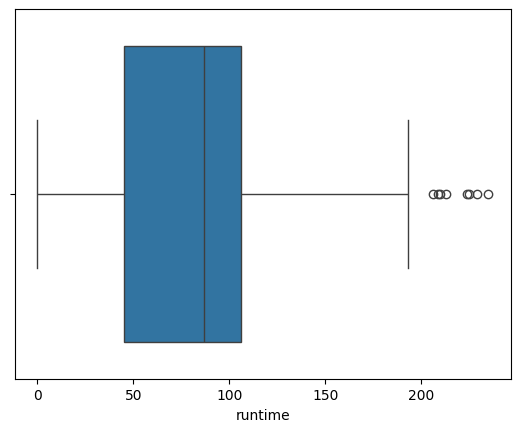

In [160]:
sns.boxplot(x=df['runtime'])
plt.show()

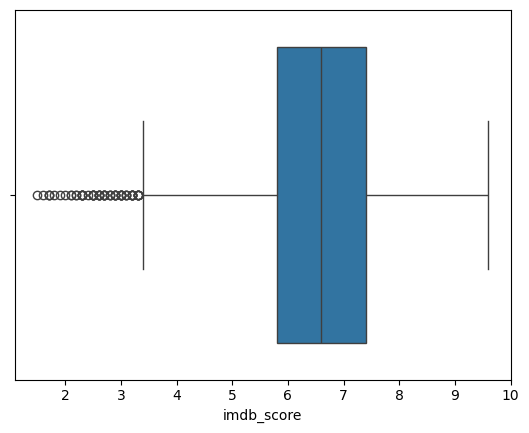

In [161]:
sns.boxplot(x=df['imdb_score'])
plt.show()

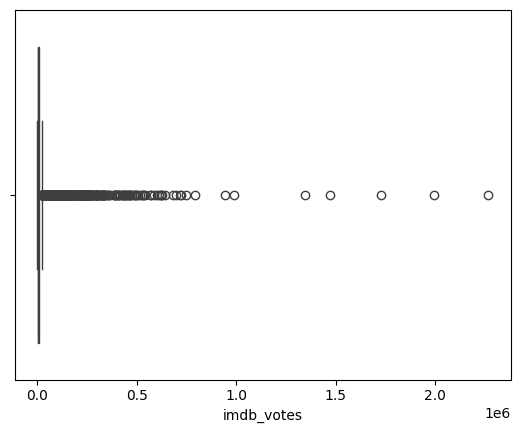

In [162]:
sns.boxplot(x=df['imdb_votes'])
plt.show()

Outlier pada imdb_votes ini tampak sangat tinggi, tentunya ini terkesan "normal" sebab memang dipengaruhi populer atau tidaknya suatu film. Akan lebih menarik mungkin jika ada satu fitur lain yang memengaruhi votes jumlah votes ini, seperti sutradara, atau studio dan sebagainya.

In [163]:
df[df['runtime'] == 0]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
450,450,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,tt6963796,7.2,55.0
455,455,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,tt6929194,6.5,96.0
535,535,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,tt0283770,7.5,303.0
840,840,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,tt6298258,8.2,677.0
2503,2503,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,tt1877895,8.6,900.0
2996,2996,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,tt12467250,7.4,8.0
3528,3528,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,tt11916718,5.7,156.0
3733,3733,ts217719,Basketball or Nothing,SHOW,the lives of the Chinle High School boys' bask...,2019,TV-PG,0,tt10698408,7.4,614.0
3743,3743,ts255418,Bad Boy Billionaires: India,SHOW,This investigative docuseries explores the gre...,2020,TV-14,0,tt12923630,7.9,3010.0
3757,3757,ts237071,The Forest of Love: Deep Cut,SHOW,Nothing's as it seems when a charismatic conma...,2020,TV-MA,0,tt12079236,6.8,426.0


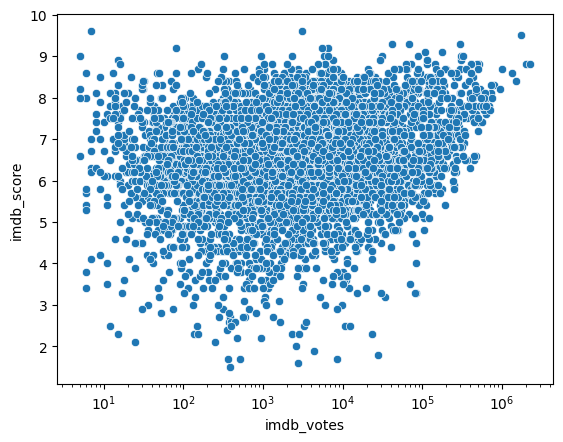

In [164]:
sns.scatterplot(x=df['imdb_votes'], y=df['imdb_score'])
plt.xscale("log")
plt.show()

Kita dapat menemukan hal menarik dari gambaran sebaran data antara votes dan score, ternyata jumlah votes terbanyak juga menghasilkan score yang tinggi juga. Artinya beberapa film yang sangat populer memang memiliki kualitas yang sangat baik dan diterima oleh banyaknya voters

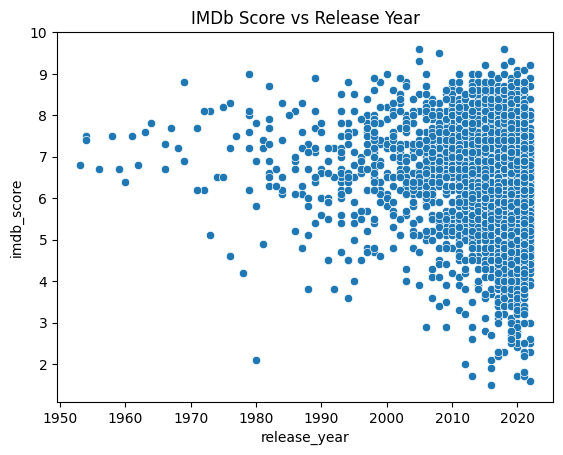

In [165]:
sns.scatterplot(x=df['release_year'], y=df['imdb_score'])
plt.title("IMDb Score vs Release Year")
plt.show()


Pada gambaran diatas, dapat kita lihat data pada dataset saya cenderung memiliki data film terbanyak rilis pada tahun 2005 - 2022 (terbaru) dibanding film film lama

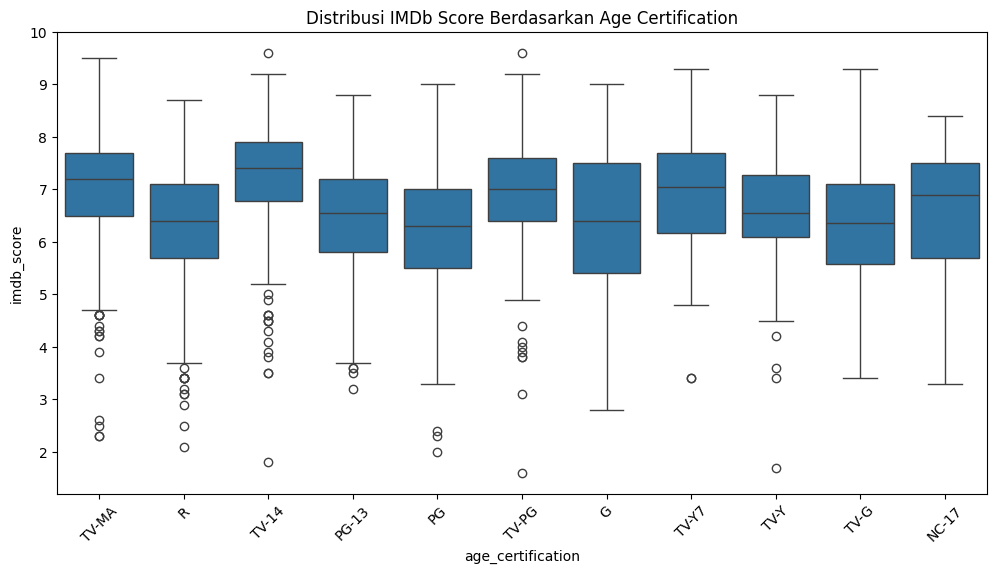

In [166]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age_certification'], y=df['imdb_score'], order=df['age_certification'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi IMDb Score Berdasarkan Age Certification")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [167]:
df['description'].fillna("No description available", inplace=True)
df.dropna(subset=['age_certification'], inplace=True)
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\1237103356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna("No description available", inplace=True)
C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\1237103356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Pada tahap ini, sebetulnya yang paling penting adalah saya melakukan drop pada data NaN age Certification, dan memberikan nilai median pada votes yang kosong (jika ada)

In [168]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [169]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'NC-17'], dtype=object)

In [170]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


In [171]:
# scaler = MinMaxScaler()
# df[['runtime', 'imdb_score', 'imdb_votes']] = scaler.fit_transform(df[['runtime', 'imdb_score', 'imdb_votes']])

Saya melakukan scalling (normalilasasi) menggunakan minmaxscaller pada nilai nilai numerikal.

In [172]:
Q1 = df['runtime'].quantile(0.25)
Q3 = df['runtime'].quantile(0.75)
IQR = Q3 - Q1


df = df[(df['runtime'] >= (Q1 - 1.5 * IQR)) & (df['runtime'] <= (Q3 + 1.5 * IQR))]


In [173]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [174]:
bins = [0, 5, 7, 10]  # Batasan skor IMDb
labels = ['Low', 'Medium', 'High']

df['imdb_category'] = pd.cut(df['imdb_score'] * 10, bins=bins, labels=labels) 


In [175]:
df['runtime'] = df['runtime'].replace(0, df['runtime'].median())

In [176]:
def encode_age_certification(row):
    age_cert = row.get('age_certification', None)
    if age_cert in ['G', 'TV-Y', 'TV-G']:
        return 1
    elif age_cert in ['PG', 'TV-PG', 'TV-Y7']:
        return 2
    elif age_cert in ['PG-13', 'TV-14']:
        return 3
    elif age_cert in ['R', 'TV-MA']:
        return 4
    elif age_cert == 'NC-17':
        return 5
    return None  # Jika nilainya tidak diketahui

df['age_certification_encoded'] = df.apply(encode_age_certification, axis=1)


Pada age certif, saya melakukan encoding manual untuk membagi atau mengurangi dimensi data pada age certification ini. dimulai dari kategori dewasa, remasa, semua umur + anak-anak, dan anak anak.

In [177]:
df['age_certification_encoded'].value_counts()

age_certification_encoded
4    1338
3     859
2     513
1     270
5      13
Name: count, dtype: int64

Hasil sebaran datanya menurut saya masih cukup diterima, meski untuk kategori 4 memiliki nilai yang sedikit tampak terlihat lebih tinggi karena diatas 1000 sendiri

In [178]:
label_encoder = LabelEncoder()
df['imdb_category_encoded'] = label_encoder.fit_transform(df['imdb_category'])
df.drop(columns=['imdb_category'], inplace=True)

In [179]:
scaler = MinMaxScaler()
numerical_features = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [180]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers(df, 'runtime')
df = remove_outliers(df, 'imdb_votes')

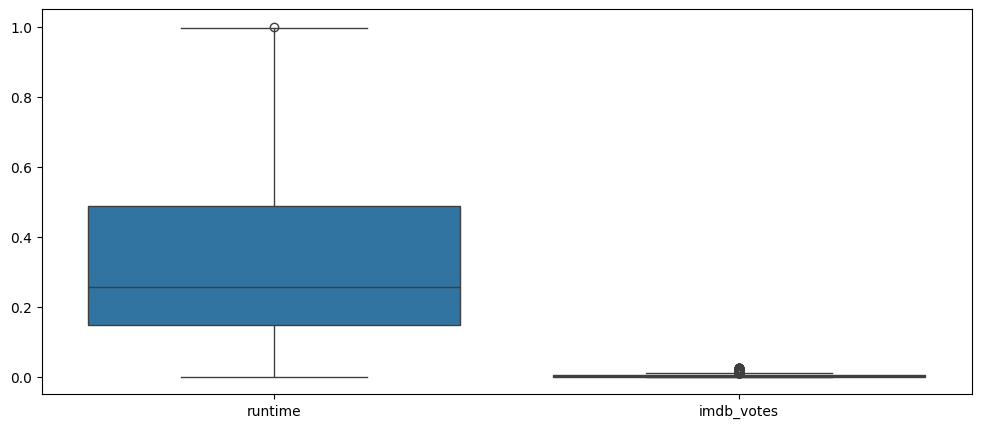

In [181]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['runtime', 'imdb_votes']])
plt.show()

In [182]:
print(df.dtypes)

index                          int64
id                            object
title                         object
type                           int64
description                   object
release_year                 float64
age_certification             object
runtime                      float64
imdb_id                       object
imdb_score                   float64
imdb_votes                   float64
age_certification_encoded      int64
imdb_category_encoded          int64
dtype: object


In [183]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,age_certification_encoded,imdb_category_encoded
9,9,tm67378,The Professionals,0,An arrogant Texas millionaire hires four adven...,0.034483,PG-13,0.602094,tt0060862,0.7125,0.007126,3,0
11,11,tm69778,Lupin the Third: The Castle of Cagliostro,0,After a successful robbery leaves famed thief ...,0.258621,PG,0.513089,tt0079833,0.7500,0.013346,2,0
12,12,tm69997,Richard Pryor: Live in Concert,0,"Richard Pryor delivers monologues on race, sex...",0.258621,R,0.397906,tt0079807,0.8125,0.002264,4,0
13,13,tm96649,The Long Riders,0,"The origins, exploits and the ultimate fate of...",0.275862,R,0.507853,tt0081071,0.6625,0.004992,4,0
17,17,tm89386,Hitler: A Career,0,A keen chronicle of the unlikely rise to power...,0.224138,PG,0.774869,tt0191182,0.7375,0.001063,2,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540 entries, 9 to 5275
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2540 non-null   int64  
 1   id                         2540 non-null   object 
 2   title                      2540 non-null   object 
 3   type                       2540 non-null   int64  
 4   description                2540 non-null   object 
 5   release_year               2540 non-null   float64
 6   age_certification          2540 non-null   object 
 7   runtime                    2540 non-null   float64
 8   imdb_id                    2540 non-null   object 
 9   imdb_score                 2540 non-null   float64
 10  imdb_votes                 2540 non-null   float64
 11  age_certification_encoded  2540 non-null   int64  
 12  imdb_category_encoded      2540 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 277.

Setelah berbagai proses diatas, kita mendapat jumlah record yang sama di 2540, meski pada proses diatas masih tampak beberapa data yang tampak tidak valid, seperti masih ada kategori none pada age certif dan 0 pada runtime

In [185]:
df.describe()

,index,type,release_year,runtime,imdb_score,imdb_votes,age_certification_encoded,imdb_category_encoded
count,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.000000,2540.0
mean,2640.615354,0.610236,0.906102,0.323727,0.630605,0.003541,3.051181,0.0
std,1485.359774,0.487793,0.101640,0.199857,0.141375,0.005174,1.022655,0.0
min,9.000000,0.000000,0.034483,0.000000,0.000000,0.000000,1.000000,0.0
25%,1362.750000,0.000000,0.896552,0.146597,0.537500,0.000288,2.000000,0.0
50%,2498.500000,1.000000,0.931034,0.256545,0.650000,0.001257,3.000000,0.0
75%,3850.500000,1.000000,0.965517,0.486911,0.737500,0.004279,4.000000,0.0
max,5275.000000,1.000000,1.000000,1.000000,1.000000,0.024083,5.000000,0.0


In [186]:
features_for_clustering = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'type', 'age_certification_encoded', 'imdb_category_encoded']

df_final = df[features_for_clustering]

# Cek hasil akhir
print(df_final.head())


    release_year   runtime  imdb_score  imdb_votes  type  \
9       0.034483  0.602094      0.7125    0.007126     0   
11      0.258621  0.513089      0.7500    0.013346     0   
12      0.258621  0.397906      0.8125    0.002264     0   
13      0.275862  0.507853      0.6625    0.004992     0   
17      0.224138  0.774869      0.7375    0.001063     0   

    age_certification_encoded  imdb_category_encoded  
9                           3                      0  
11                          2                      0  
12                          4                      0  
13                          4                      0  
17                          2                      0  


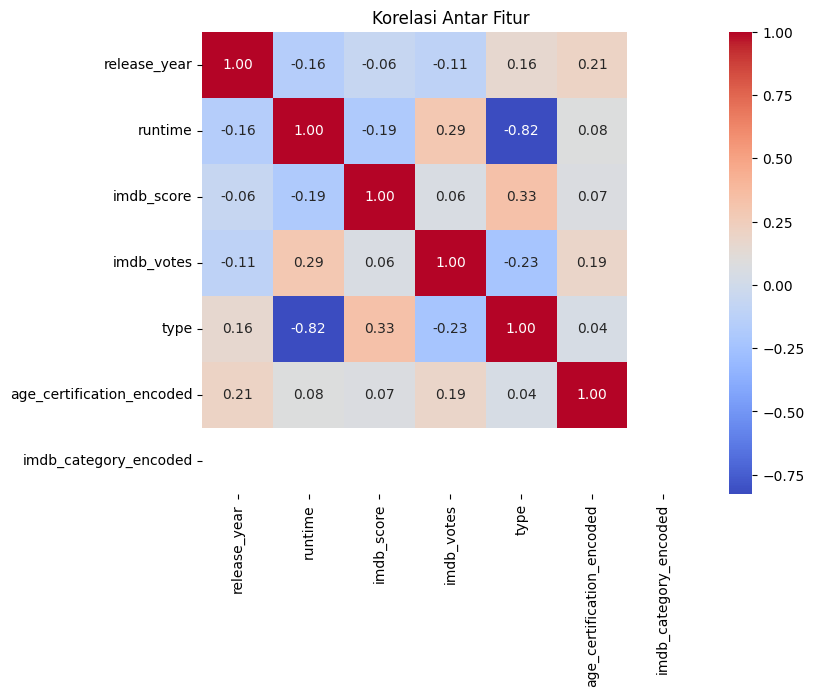

In [187]:
plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [188]:
# Tentuksn jumlah cluster
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(df_final)

print(df_final.head())

    release_year   runtime  imdb_score  imdb_votes  type  \
9       0.034483  0.602094      0.7125    0.007126     0   
11      0.258621  0.513089      0.7500    0.013346     0   
12      0.258621  0.397906      0.8125    0.002264     0   
13      0.275862  0.507853      0.6625    0.004992     0   
17      0.224138  0.774869      0.7375    0.001063     0   

    age_certification_encoded  imdb_category_encoded  cluster  
9                           3                      0        0  
11                          2                      0        2  
12                          4                      0        0  
13                          4                      0        0  
17                          2                      0        2  


C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\3703805203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = kmeans.fit_predict(df_final)


Saya menggunakan algoritma K-means, karena, tentunya cenderung sederhana. (INFO), sebelumnya saya mencoba berbagai model, terutama pada DBSCAN yang notabenenya lebih tangguh menghadapi outlier namun at the end K-means menghasilkan sillhoutte lebih baik dibanding algoritma lainnya

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [189]:
# Menghitung silhouette
score = silhouette_score(df_final.drop(columns=['cluster']), df_final['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5194


Sillhoutte score yang dihasilkan cukup baik tanpa treatmen tambahan pada 0.43, target saya adalah 0.7 untuk mendapat nilai minimum pada score yang direkomendasikan

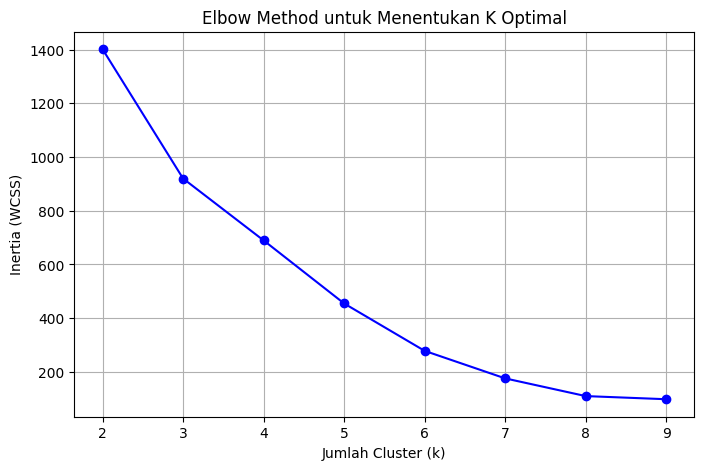

In [190]:
# Coba berbagai jumlah cluster (k)
wcss = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final.drop(columns=['cluster']))
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xticks(k_values)
plt.grid()
plt.show()

Pada elbow MEthod ini, tampak "siku" nya terletak pada cluster ideal 3. (spoiler, K yang menghasilkan sillhoutte score terbaik bukan 3)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [191]:
# Pisahkan fitur dan label cluster
X = df_final.drop(columns=['cluster'])  
y = df_final['cluster']  

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'Fitur': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Fitur  Importance
5  age_certification_encoded    0.496850
4                       type    0.238911
1                    runtime    0.185539
2                 imdb_score    0.032015
3                 imdb_votes    0.030258
0               release_year    0.016427
6      imdb_category_encoded    0.000000


Saya menggunakan algoritma random forest untuk menentukan fitur terbaik yang bisa diimplementasikan pada model. Untuk lebih mudahnya, dapat kita lihat dengan visualisasi dibawah ini.

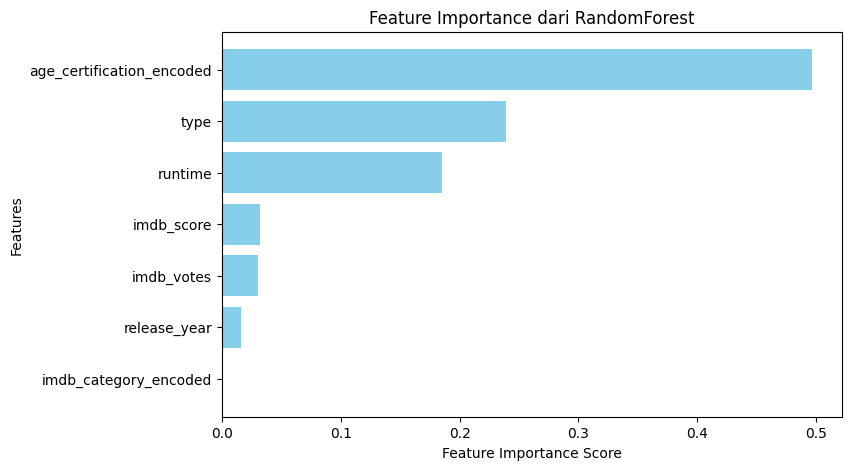

In [192]:
# Visualisasi
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Fitur'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dari RandomForest")
plt.gca().invert_yaxis()
plt.show()

Pada visualisasi diatas, dapat kita lihat age certification, imdb score, imdb_category_encoded, dan runtime yang memiliki pengaruh penting pada model. Dikarenakan imdb_category_encode pada dasarnya kita ambil dari imdb_score, maka saya berencana hnaya mengambil imdb_score saja. Jadi fitur yang akan saya lanjutkan adalah age_certification_encoded, imdb_score, dan runtime.

In [193]:
# Pilih fitur penting
selected_features_last = ['age_certification_encoded', 'imdb_score', 'runtime']

df_selected = df_final[selected_features_last]

In [194]:
# Mengunakan K yang sudah didapat dari Elbow Method
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

df_selected['cluster'] = kmeans.fit_predict(df_selected)


C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\3775978281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_selected)


In [195]:
# Evaluasi ulang dengan Silhouette Score
score = silhouette_score(df_selected.drop(columns=['cluster']), df_selected['cluster'])
print(f"Silhouette Score setelah feature selection: {score:.4f}")

Silhouette Score setelah feature selection: 0.6627


Hasil nya ternyata meningkat sangat signifikan dari 0.4 ke 0.6. Tapi tentunya itu belum cukup, karena target saya adalah 0.7. MAri lanjutkan dengan memilih K optimal menggunakan method lain.

In [196]:
# Gunakan K yang sudah didapat dari Elbow Method
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)

df_selected['cluster'] = kmeans.fit_predict(df_selected)

C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\2224091869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_selected)


In [197]:
# Evaluasi ulang dengan Silhouette Score
score = silhouette_score(df_selected.drop(columns=['cluster']), df_selected['cluster'])
print(f"Silhouette Score setelah feature selection: {score:.4f}")

Silhouette Score setelah feature selection: 0.7176


Ternyata K lebih optimal di angka 4 dibanding sesuai dengan Elbow(3). Dan kita sudah mendapat score optimal sesuai yang diharapkan. Namun sebelum melanjutkan, perlu dipastikan bahwa meski score nya cukup tinggi, apakah model ini memiliki distribusi data yang baik atau hanya cenderung pada satu dua cluster saja.

In [198]:
df_selected['cluster'].value_counts()


cluster
0    1107
2     709
1     459
3     265
Name: count, dtype: int64

Dari data diatas, ternyata distribusi data clusternya cukup, tidak terlalu jauh dibanding cluster cluster lainnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

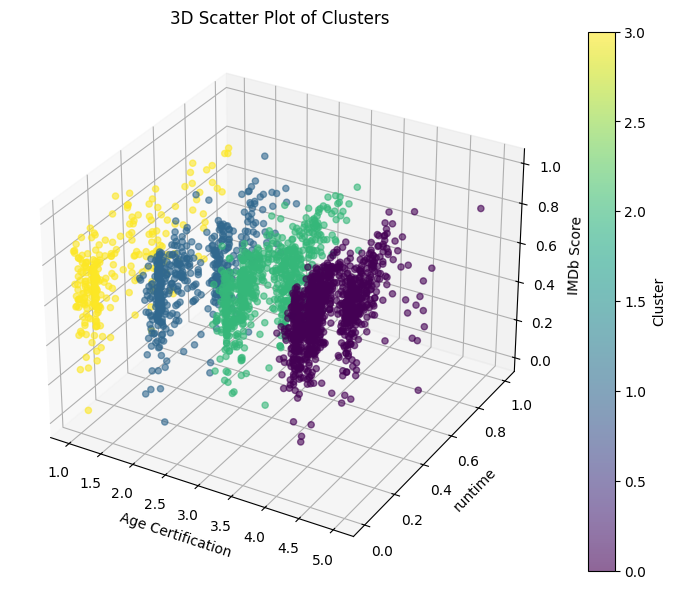

In [199]:
# Scatter plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_selected['age_certification_encoded'], 
    df_selected['runtime'], 
    df_selected['imdb_score'], 
    c=df_selected['cluster'], cmap='viridis', alpha=0.6
)

ax.set_xlabel("Age Certification")
ax.set_ylabel("runtime")
ax.set_zlabel("IMDb Score")
ax.set_title("3D Scatter Plot of Clusters")
plt.colorbar(scatter, label="Cluster")
plt.show()


Dikarenakan saya menggunakan 3 Fitur, jadi saya buat visualisasi grafik 3D dibanding menggunakan PCA. Karena saya belum cukup mengerti PCA dibanding scatterplot. Dari hasil visualisasi diatas, tampak clusternya cukup terpisah dengan baik pada model yang dibuat.

In [200]:
df_selected["cluster"].value_counts(normalize=True)


cluster
0    0.435827
2    0.279134
1    0.180709
3    0.104331
Name: proportion, dtype: float64

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [201]:
age_cert_mapping = {
    1: ['G', 'TV-Y', 'TV-G'],
    2: ['PG', 'TV-PG', 'TV-Y7'],
    3: ['PG-13', 'TV-14'],
    4: ['R', 'TV-MA'],
    5: ['NC-17'],
    0: ['Unrated/Unknown']
}

df_selected['age_certification'] = df_selected['age_certification_encoded'].map(lambda x: age_cert_mapping.get(x, 'Unknown'))


C:\Users\Vrooh\AppData\Local\Temp\ipykernel_19304\2863229417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['age_certification'] = df_selected['age_certification_encoded'].map(lambda x: age_cert_mapping.get(x, 'Unknown'))


In [202]:
df[['release_year', 'runtime', 'imdb_score', 'imdb_votes']] = scaler.inverse_transform(df[['release_year', 'runtime', 'imdb_score', 'imdb_votes']])

In [203]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,age_certification_encoded,imdb_category_encoded
9,9,tm67378,The Professionals,0,An arrogant Texas millionaire hires four adven...,1966.0,PG-13,117.0,tt0060862,7.3,16168.0,3,0
11,11,tm69778,Lupin the Third: The Castle of Cagliostro,0,After a successful robbery leaves famed thief ...,1979.0,PG,100.0,tt0079833,7.6,30277.0,2,0
12,12,tm69997,Richard Pryor: Live in Concert,0,"Richard Pryor delivers monologues on race, sex...",1979.0,R,78.0,tt0079807,8.1,5141.0,4,0
13,13,tm96649,The Long Riders,0,"The origins, exploits and the ultimate fate of...",1980.0,R,99.0,tt0081071,6.9,11329.0,4,0
17,17,tm89386,Hitler: A Career,0,A keen chronicle of the unlikely rise to power...,1977.0,PG,150.0,tt0191182,7.5,2416.0,2,0


In [204]:
# Lakukan agregasi
agg_results = df_selected.groupby("cluster").agg({
    "age_certification": lambda x: x.mode().iloc[0],
    "runtime": ["min", "max", "mean"],
    "imdb_score": ["min", "max", "mean"]
})

agg_results.columns = ['age_certification_mode', 'runtime_min', 'runtime_max', 'runtime_mean', 'imdb_score_min', 'imdb_score_max', 'imdb_score_mean']

print(agg_results.to_string())

        age_certification_mode  runtime_min  runtime_max  runtime_mean  imdb_score_min  imdb_score_max  imdb_score_mean
cluster                                                                                                                
0                   [R, TV-MA]     0.005236     0.921466      0.320918          0.0625          0.9250         0.632599
1           [PG, TV-PG, TV-Y7]     0.000000     1.000000      0.317855          0.0000          1.0000         0.615387
2               [PG-13, TV-14]     0.031414     0.994764      0.361530          0.0250          1.0000         0.648731
3              [G, TV-Y, TV-G]     0.000000     0.963351      0.244493          0.0125          0.9625         0.600142


Dari hasil agregasi diatas, dapat kita simpulkan beberapa pola, diantaranya :

Cluster 0: didapatkan karena runtime memiliki nilai rata-rata 0.3209 dengan batas minimum 0.0052 dan batas maksimum 0.9215, serta imdb_score memiliki rata-rata 0.6326 dengan batas minimum 0.0625 dan batas maksimum 0.9250. Variabel kategori age_certification memiliki nilai modus kategori [R, TV-MA], menunjukkan bahwa klaster ini didominasi oleh konten dengan batasan usia ketat untuk dewasa.

Cluster 1 : didapatkan karena runtime memiliki nilai rata-rata 0.3179 dengan batas minimum 0.0000 dan batas maksimum 1.0000, serta imdb_score memiliki rata-rata 0.6154 dengan batas minimum 0.0000 dan batas maksimum 1.0000. Variabel kategori age_certification memiliki nilai modus kategori [PG, TV-PG, TV-Y7], menunjukkan bahwa klaster ini lebih banyak berisi konten yang ramah anak-anak dan remaja.

Cluster 2 : didapatkan karena runtime memiliki nilai rata-rata 0.3615 dengan batas minimum 0.0314 dan batas maksimum 0.9948, serta imdb_score memiliki rata-rata 0.6487 dengan batas minimum 0.0250 dan batas maksimum 1.0000. Variabel kategori age_certification memiliki nilai modus kategori [PG-13, TV-14], menunjukkan bahwa klaster ini mencakup konten untuk remaja dengan sedikit batasan usia.

Cluster 3 : didapatkan karena runtime memiliki nilai rata-rata 0.2445 dengan batas minimum 0.0000 dan batas maksimum 0.9634, serta imdb_score memiliki rata-rata 0.6001 dengan batas minimum 0.0125 dan batas maksimum 0.9625. Variabel kategori age_certification memiliki nilai modus kategori [G, TV-Y, TV-G], menunjukkan bahwa klaster ini berisi konten dengan rating yang aman untuk semua umur.


Tulis hasil interpretasinya di sini.
### **Interpretasi Hasil Klasterisasi**  

1. **Klaster 0**  
   - **Variabel target**: Kelompok film dengan kategori usia **[R, TV-MA]**.  
   - **Variabel 1 (Runtime)**:  
     - **Nilai rata-rata**: **0.3209**  
     - **Batas minimum**: **0.0052**  
     - **Batas maksimum**: **0.9215**  
   - **Variabel 2 (IMDb Score)**:  
     - **Nilai rata-rata**: **0.6326**  
     - **Batas minimum**: **0.0625**  
     - **Batas maksimum**: **0.9250**  
   - **Nilai modus kategori (Age Certification)**: **[R, TV-MA]**  

   **Interpretasi**:  
   Klaster ini berisi film-film dengan durasi yang bervariasi namun cenderung lebih panjang dibanding klaster lainnya. Skor IMDb yang diperoleh cukup baik, dengan rata-rata **0.6326**. Film-film dalam klaster ini didominasi oleh kategori **R** dan **TV-MA**, menunjukkan bahwa sebagian besar film di sini ditujukan untuk penonton dewasa.  

2. **Klaster 1**  
   - **Variabel target**: Kelompok film dengan kategori usia **[PG, TV-PG, TV-Y7]**.  
   - **Variabel 1 (Runtime)**:  
     - **Nilai rata-rata**: **0.3179**  
     - **Batas minimum**: **0.0000**  
     - **Batas maksimum**: **1.0000**  
   - **Variabel 2 (IMDb Score)**:  
     - **Nilai rata-rata**: **0.6154**  
     - **Batas minimum**: **0.0000**  
     - **Batas maksimum**: **1.0000**  
   - **Nilai modus kategori (Age Certification)**: **[PG, TV-PG, TV-Y7]**  

   **Interpretasi**:  
   Klaster ini terdiri dari film yang lebih ramah keluarga dengan durasi yang cukup beragam. IMDb Score dalam klaster ini cukup bervariasi, dengan rata-rata **0.6154**, yang menandakan banyak film berkualitas sedang hingga baik. Mayoritas film dalam klaster ini memiliki rating **PG, TV-PG, dan TV-Y7**, menunjukkan bahwa film dalam kelompok ini cenderung cocok untuk penonton muda dan keluarga.  

3. **Klaster 2**  
   - **Variabel target**: Kelompok film dengan kategori usia **[PG-13, TV-14]**.  
   - **Variabel 1 (Runtime)**:  
     - **Nilai rata-rata**: **0.3615**  
     - **Batas minimum**: **0.0314**  
     - **Batas maksimum**: **0.9948**  
   - **Variabel 2 (IMDb Score)**:  
     - **Nilai rata-rata**: **0.6487**  
     - **Batas minimum**: **0.0250**  
     - **Batas maksimum**: **1.0000**  
   - **Nilai modus kategori (Age Certification)**: **[PG-13, TV-14]**  

   **Interpretasi**:  
   Klaster ini berisi film dengan rating **PG-13** dan **TV-14**, yang umumnya ditujukan untuk remaja. Rata-rata durasi dalam klaster ini lebih panjang dibanding klaster lainnya (**0.3615**). IMDb Score cenderung lebih tinggi dengan rata-rata **0.6487**, menunjukkan bahwa film dalam klaster ini memiliki tingkat kepuasan yang lebih baik dibanding klaster lainnya.  

4. **Klaster 3**  
   - **Variabel target**: Kelompok film dengan kategori usia **[G, TV-Y, TV-G]**.  
   - **Variabel 1 (Runtime)**:  
     - **Nilai rata-rata**: **0.2445**  
     - **Batas minimum**: **0.0000**  
     - **Batas maksimum**: **0.9634**  
   - **Variabel 2 (IMDb Score)**:  
     - **Nilai rata-rata**: **0.6001**  
     - **Batas minimum**: **0.0125**  
     - **Batas maksimum**: **0.9625**  
   - **Nilai modus kategori (Age Certification)**: **[G, TV-Y, TV-G]**  

   **Interpretasi**:  
   Klaster ini mencakup film yang sepenuhnya aman untuk anak-anak, dengan kategori usia **G, TV-Y, dan TV-G**. Film dalam klaster ini cenderung memiliki durasi yang lebih pendek dibanding klaster lainnya (**0.2445**). IMDb Score rata-rata **0.6001**, yang menunjukkan bahwa meskipun film ini ramah anak, kualitasnya bisa bervariasi.  

---

### **Kesimpulan**  
Klasterisasi ini berhasil memisahkan film berdasarkan kategori usia, durasi, dan skor IMDb.  
- **Klaster 0** didominasi oleh film dewasa (**R, TV-MA**) dengan durasi panjang dan skor IMDb cukup tinggi.  
- **Klaster 1** berisi film ramah keluarga (**PG, TV-PG, TV-Y7**) dengan durasi bervariasi dan skor IMDb menengah.  
- **Klaster 2** mencakup film remaja (**PG-13, TV-14**) dengan skor IMDb tertinggi di antara semua klaster.  
- **Klaster 3** adalah film anak-anak (**G, TV-Y, TV-G**) dengan durasi pendek dan skor IMDb yang cukup baik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [205]:
df.to_csv('data/Dataset_inisiasi.csv', index=False)